In [28]:
import sklearn
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif                   
from sklearn import datasets
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Creating a PCA from scratch

In [16]:
dataset = datasets.load_iris()
columns = dataset["feature_names"]
iris_data = pd.concat([pd.DataFrame(dataset["data"], columns=columns), pd.DataFrame(dataset["target"], columns=["target"])], axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X = iris_data.drop(columns=["target"])
y = iris_data["target"]

In [42]:
num_components = 2
pca = PCA(n_components=num_components, svd_solver='randomized')
pca.fit(X)
pca.transform(X)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [41]:
pca_data = pd.DataFrame(pca.fit_transform(X), columns=[f"Principal Component {i}" for i in range(num_components)])

sns.scatterplot(pca_data, x="Principal Component 0", y="Principal Component 1",  hue="target", style="target")

ValueError: Could not interpret value `target` for `hue`. An entry with this name does not appear in `data`.

Text(0, 0.5, 'Percentage')

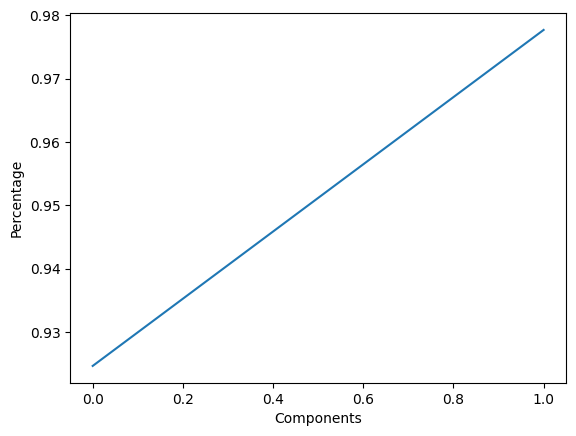

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Percentage")

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

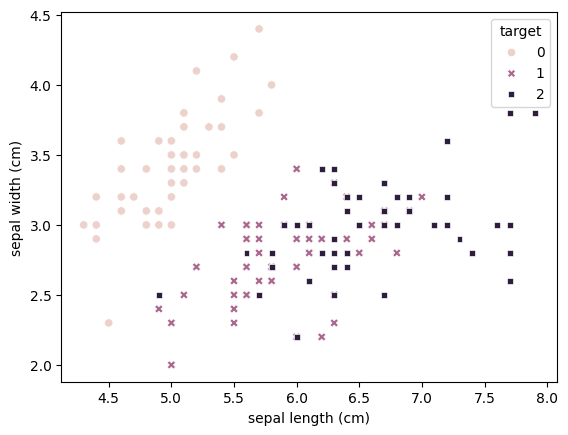

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
sns.scatterplot(data=iris_data, x="sepal length (cm)", y="sepal width (cm)", hue="target", style="target")

In [25]:
load_dataset = datasets.load_diabetes()
diabetes_data = pd.DataFrame(load_dataset["data"], columns=load_dataset["feature_names"])
diabetes_data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


<Axes: >

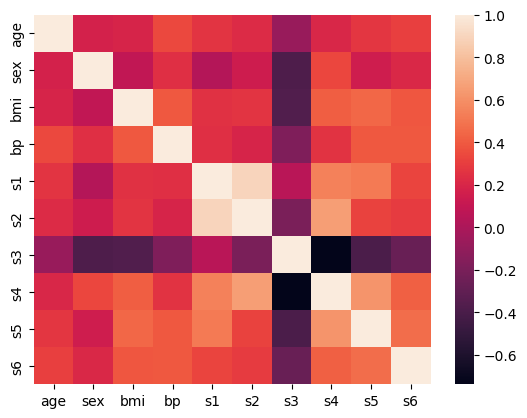

In [44]:
sns.heatmap(diabetes_data.corr())